**--- Inicio Colab ---**


In [2]:
# Monto drive en colab
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!cp '/content/gdrive/My Drive/Colab Notebooks/tp2-datos/feature_builder.py' '/content'
!cp '/content/gdrive/My Drive/Colab Notebooks/tp2-datos/util.py' '/content'
!cp '/content/gdrive/My Drive/Colab Notebooks/tp2-datos/hyperparameter_tuning.py' '/content'
!cp '/content/gdrive/My Drive/Colab Notebooks/tp2-datos/feature_builder.py' '/content'
!cp '/content/gdrive/My Drive/Colab Notebooks/tp2-datos/train.csv' '/content'
!cp '/content/gdrive/My Drive/Colab Notebooks/tp2-datos/test.csv' '/content'
!mkdir /content/data/embeddings
!wget -P /content/data/embeddings -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!gunzip '/content/data/embeddings/GoogleNews-vectors-negative300.bin.gz'
!mv '/content/data/embeddings/GoogleNews-vectors-negative300.bin' '/content/data/embeddings/word2vec.bin'

mkdir: cannot create directory ‘/content/data/embeddings’: No such file or directory
--2020-07-24 15:23:42--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.47.166
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.47.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/content/data/embeddings/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  43.4MB/s    in 36s     

2020-07-24 15:24:18 (44.1 MB/s) - ‘/content/data/embeddings/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

**--- Fin Colab ---**

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing import sequence
from tensorflow import keras
from tensorflow.keras import layers
from gensim.models import KeyedVectors
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Embedding, GlobalMaxPooling1D, Dropout, LSTM,Input,Activation,Bidirectional,GRU
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
from sklearn.metrics import f1_score
import feature_builder
import util
import hyperparameter_tuning
embeddings = None
from hyperopt import hp,STATUS_OK

In [8]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
Y = train_df['target'].values

In [18]:
def prepare_for_cnn(df):
    processed = feature_builder.process_dataset(df,encoding_type='mean')
    return (processed, processed.to_numpy().reshape(processed.shape[0], 1, processed.shape[1]))

In [19]:
processed, X_processed = prepare_for_cnn(train_df)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Embeddings loaded!
Percentage of words covered in the embeddings = 0.4937444933920705
Embeddings loaded!
Percentage of words covered in the embeddings = 0.5879980378263476


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_processed,Y,test_size = 0.33,random_state = 17)

In [71]:
def GRU():
    model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128),input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(256 , activation='relu'),
    tf.keras.layers.Dropout(0.39233485336896456),
    tf.keras.layers.Dense(1)])
    return model

In [72]:
model = GRU()
model.summary()
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_9 (Bidirection (None, 512)               1368576   
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 257       
Total params: 1,500,161
Trainable params: 1,500,161
Non-trainable params: 0
_________________________________________________________________


In [73]:
history = model.fit(X_train, y_train, epochs=30, shuffle=False, validation_split=0.0)

Epoch 1/30
160/160 [==============================] - 1s 5ms/step - loss: 0.6452 - accuracy: 0.5918
Epoch 2/30
160/160 [==============================] - 1s 5ms/step - loss: 0.5948 - accuracy: 0.6516
Epoch 3/30
160/160 [==============================] - 1s 5ms/step - loss: 0.5555 - accuracy: 0.7020
Epoch 4/30
160/160 [==============================] - 1s 5ms/step - loss: 0.5127 - accuracy: 0.7394
Epoch 5/30
160/160 [==============================] - 1s 5ms/step - loss: 0.4823 - accuracy: 0.7639
Epoch 6/30
160/160 [==============================] - 1s 5ms/step - loss: 0.4577 - accuracy: 0.7939
Epoch 7/30
160/160 [==============================] - 1s 5ms/step - loss: 0.4415 - accuracy: 0.7992
Epoch 8/30
160/160 [==============================] - 1s 5ms/step - loss: 0.4274 - accuracy: 0.8037
Epoch 9/30
160/160 [==============================] - 1s 5ms/step - loss: 0.4194 - accuracy: 0.8106
Epoch 10/30
160/160 [==============================] - 1s 5ms/step - loss: 0.4122 - accuracy: 0.8165

KeyError: ignored

In [74]:
prediction = model.predict_classes(X_test)

In [75]:
accuracy_score(y_test, prediction)

0.8225228810187027

In [76]:
f1 = f1_score(y_test, prediction,average=None)
mean_f1 = (f1[0] + f1[1]) / 2
mean_f1

0.8132142800004267

Para kaggle

In [21]:
y_train = train_df['target'].values

In [23]:
def GRU():
    model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128),input_shape=(X_processed.shape[1], X_processed.shape[2])),
    tf.keras.layers.Dense(256 , activation='relu'),
    tf.keras.layers.Dropout(0.39233485336896456),
    tf.keras.layers.Dense(1)])
    return model

In [24]:
model = GRU()
model.summary()
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 256)               585984    
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 652,033
Trainable params: 652,033
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_processed, y_train, epochs=50, shuffle=False, validation_split=0.0)

Epoch 1/50
238/238 [==============================] - 1s 4ms/step - loss: 0.6822 - accuracy: 0.5903
Epoch 2/50
238/238 [==============================] - 1s 4ms/step - loss: 0.6360 - accuracy: 0.6205
Epoch 3/50
238/238 [==============================] - 1s 4ms/step - loss: 0.6006 - accuracy: 0.6570
Epoch 4/50
238/238 [==============================] - 1s 4ms/step - loss: 0.5674 - accuracy: 0.6875
Epoch 5/50
238/238 [==============================] - 1s 4ms/step - loss: 0.5399 - accuracy: 0.7184
Epoch 6/50
238/238 [==============================] - 1s 4ms/step - loss: 0.5137 - accuracy: 0.7424
Epoch 7/50
238/238 [==============================] - 1s 4ms/step - loss: 0.4938 - accuracy: 0.7563
Epoch 8/50
238/238 [==============================] - 1s 4ms/step - loss: 0.4745 - accuracy: 0.7680
Epoch 9/50
238/238 [==============================] - 1s 4ms/step - loss: 0.4585 - accuracy: 0.7837
Epoch 10/50
238/238 [==============================] - 1s 4ms/step - loss: 0.4468 - accuracy: 0.7921

In [26]:
ids = test_df['id']

processed, final_test = prepare_for_cnn(test_df)
prediction = model.predict_classes(final_test)

final_df = pd.DataFrame({'target': [x[0] for x in prediction]}, index=ids)
final_df

Embeddings loaded!
Percentage of words covered in the embeddings = 0.5707598689343111
Embeddings loaded!
Percentage of words covered in the embeddings = 0.6603057058767683
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,target
id,
0,1
2,1
3,1
9,1
11,1
...,...
10861,0
10865,1
10868,1


In [27]:
final_df['target'].value_counts()

0    2047
1    1216
Name: target, dtype: int64

In [30]:
final_df.to_csv('gru.csv')

0    2047
1    1216
Name: target, dtype: int64

Hyperopt (bayesian)

In [85]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
Y = train_df['target'].values

In [86]:
processed = feature_builder.process_dataset(train_df)
X_processed = processed.to_numpy().reshape(processed.shape[0], 1, processed.shape[1])
X_train, X_test, y_train, y_test = train_test_split(X_processed,Y,test_size = 0.33,random_state = 17)

Embeddings loaded!
Percentage of words covered in the embeddings = 0.4937444933920705
Embeddings loaded!
Percentage of words covered in the embeddings = 0.5879980378263476


In [179]:
def gru(params):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(params['units']),input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dense(params['units2'], activation=params['activation']))
    model.add(tf.keras.layers.Dropout(params['dropout']))
    model.add(tf.keras.layers.Dense(1))

    model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
    
    result = model.fit(X_train, y_train, epochs=50, shuffle=True, validation_split=0.2,verbose=0)
    prediction = model.predict_classes(X_test)
    f1 = f1_score(y_test, prediction,average=None)
    mean_f1 = (f1[0] + f1[1]) / 2
    mean_f1
    print('\nScore:',mean_f1)
    return {'loss': -mean_f1, 'status': STATUS_OK, 'model': model}


In [180]:
space = {'units': hp.choice('units',[16,32,64,128,256]),
        'units2': hp.choice('units2',[16,32,64,128,256]),
        'dropout': hp.uniform('dropout',0,1),
        'activation': hp.choice('activation',['relu','sigmoid'])
        }

        activation': relu, 'dropout': 0.39233485336896456, 'units': 128, 'units2':256


Score:
0.7936176852730024

Score:
0.7902346144005522

Score:
0.36347517730496454

Score:
0.799255549812377

Score:
0.7924193628869011

Score:
0.7942850732632816

Score:
0.7968269097019088

Score:
0.7651793499612549

Score:
0.7744760937736377

Score:
0.7940605606132469

Score:
0.6194242504596956

Score:
0.7822807428471241

Score:
0.7788477482032379

Score:
0.7845414269621811

Score:
0.7955511850363506

Score:
0.7947344362531842

Score:
0.7624205619300652

Score:
0.7909013642338467

Score:
0.7921368668874227

Score:
0.8080763486736592

Score:
0.7976292916794763

Score:
0.8028635181531374

Score:
0.7908826352235505

Score:
0.7934151609013887

Score:
0.799255549812377

Score:
0.7910796258140526

Score:
0.8089301562207095

Score:
0.7936176852730024

Score:
0.7994727161637281

Score:
0.7939505251678816

Score:
0.791182349609581

Score:
0.7747038706238275

Score:
0.7927050435159448

Score:
0.8023092573364674

Score:
0.8075900506654627

Score:
0.7987125134484008

Score:
0.7952563009369489

Sc

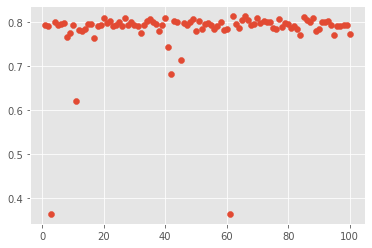

In [182]:
import importlib
importlib.reload(hyperparameter_tuning)
hyperparameter_tuning.bayesian_optimization(gru,space,max_evals=100)